# EXERCISE 4

## Task: Plot bar charts of histograms of any three different distributions listed at the following [link](https://numpy.org/doc/stable/reference/random/generator.html#distributions).
- essentially we are being asked to replicate the process where we created a standard distribution histogram (or bar chart if it is discrete, as opposed to continuous, data, but with one of the other distributions that we have not yet encountered. Not all of them operate the same way, or use the same parameters, so you'll need to investigate how the three that you choose work rather than just diving in.
- pick three, decide whether each is discrete or continuous (so bar vs. histogram), generate some samples, plot it, and give some sort of brief overview of basic explanations you find on google.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import webbrowser as wp

### Distribution 1 - Triangular

The triangular distribution is a continuous distribution that accepts three compulsory parameters:

- `left` determines the minimum value within the dataset;
- `mode` determines the most common value found within the dataset;
- `right` determines the maximum value.
    
  A fourth parameter, `size` is effectively compulsory as it defaults to 1, with the following result:

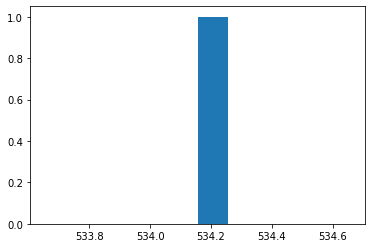

In [2]:
rng = np.random.default_rng()
vals = rng.triangular(left=-1000,mode=650,right=1000)
plt.hist(vals)
plt.show()

As can be seen above, the triangular distribution function returns a single column of data made up of a single number, if `size` is omitted as a parameter. I include this as an example of an error I made in not reading the documentation properly. When included, the below is produced:

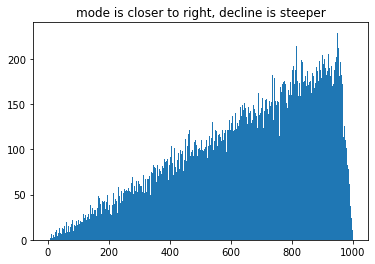

In [3]:
# defining the lowest, modal and maximum values of the dataset
left = 0
mode = 958
right = 1000

# assigning a variable to the difference between the elements above
incline = mode - left
decline = right - mode

# a loop that works out whether the mode is closer to the minimum or maximum value
if decline > incline:
    steep = "mode is closer to left, incline is steeper"
if decline < incline:
    steep = "mode is closer to right, decline is steeper"
else:
    steep = "mode equals median value, incline and decline are the same"

# in this part of the code I've plugged the triangular distribution into sample code provided in the lecture
rng = np.random.default_rng()
vals = rng.triangular(left=left,mode=mode,right=right,size=100000)
plt.hist(vals, bins=1000)
# using the output of the loop above to create a title
plt.title(steep)
plt.show()


The `mode` parameter effectively acts as a pivot on the shape of the dataset; if the value of `left` subtracted from `mode` is greater than `mode` subtracted from `right`, then a steeper incline will be produced. If the latter value is greater, than a decline that is steeper than the incline will be produced, and if the modal value is also the median value, this is known as [symmetrical triangular distribution](https://en.wikipedia.org/wiki/Triangular_distribution#Symmetric_triangular_distribution).

### Distribution 2 - Multinomial
The multinomial distribution is a discrete distribution similar to the binomial distribution, but generates experiments with more than two outcomes. The [NumPy documentation] lists a sequence of dice as the classic example of this. The parameters for this function are:

- `n`, the number of experiments to perform;
- `pvals`, the probability of each outcome occurring;
- `size`, the number of times `n` should be repeated.

To demonstrate this in a plot, I chose xample could be something like, if a dice is rolled in 1000 sequences of 10 rolls, how many times would a sequence sum up to a particular value? It took me far too long messing around with loops and lists to achieve this, and there is almost certainly a more efficient way to write this, but it feels beneficial.

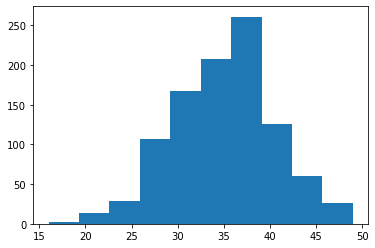

Sum of Values: [33, 32, 44, 41, 33, 37, 38, 39, 40, 37, 33, 35, 32, 25, 38, 33, 38, 38, 35, 21, 44, 34, 33, 31, 38, 33, 26, 46, 26, 32, 40, 32, 34, 35, 36, 38, 39, 34, 33, 33, 45, 34, 36, 34, 37, 41, 25, 34, 41, 36, 34, 23, 35, 32, 35, 33, 39, 26, 25, 22, 37, 32, 38, 30, 32, 33, 33, 27, 30, 33, 39, 36, 42, 35, 32, 35, 43, 27, 37, 30, 35, 39, 40, 42, 31, 33, 26, 41, 34, 45, 28, 37, 36, 42, 34, 33, 37, 31, 33, 30, 31, 46, 34, 28, 35, 31, 33, 30, 26, 39, 29, 26, 29, 35, 30, 37, 31, 30, 25, 35, 38, 30, 38, 31, 26, 32, 32, 36, 37, 33, 32, 36, 40, 27, 29, 37, 31, 29, 33, 36, 30, 38, 46, 32, 28, 32, 27, 35, 42, 28, 43, 33, 42, 35, 24, 37, 37, 30, 36, 31, 34, 35, 38, 31, 32, 36, 32, 24, 33, 31, 33, 35, 36, 32, 34, 33, 39, 30, 26, 33, 34, 33, 43, 33, 31, 32, 34, 38, 32, 38, 33, 35, 36, 38, 20, 48, 35, 37, 35, 35, 34, 39, 30, 41, 38, 37, 42, 36, 41, 37, 42, 37, 35, 38, 44, 23, 45, 43, 32, 33, 37, 35, 31, 33, 25, 35, 37, 32, 27, 34, 44, 27, 37, 38, 42, 40, 34, 31, 35, 27, 36, 34, 46, 41, 38, 24, 

In [4]:
# this portion of the code is taken from the numPy documentation for binomial distribution to replicate dice rolls
rng = np.random.default_rng()
# the parameters here translate to: roll a dice ten times, and repeat this 20 times, in which each of the six
# outcomes has an equal chance of occurring.
arrs = rng.multinomial(10,[1/6.]*6,size=1000)
# the loop here is something I came up with by reading through an article by Euan Russano in the README, and then 
# going off the deep-end. Firstly assigns a count variable to count through the arrays, as well as adding an empty
# list to store the sum of each roll in each array. Finally uses an empty list to store total sum of each sequence.
count = 0
val_by_dot = []
sum_of_arr = []

for arr in arrs:
    # counts through the sequence, assigns a number to each array
    count = count + 1
    # counts through the array, assigns a number to each roll, resets to zero after each array
    count_roll = 0
    # list to house values of each sequence
    value_array = []
    for i in arr:
        # adds 1 to roll count
        count_roll = count_roll + 1
        # multiplies number of rolls by that dice value
        value = i * count_roll
        value_array.append(value)
    # error was here, I added the append inside the roll loop, not the array loop!
    val_by_dot.append(value_array)

for item in val_by_dot:
    item_sum = sum(item)
    sum_of_arr.append(item_sum)
    
# histogram to display the number of times each sum is 
plt.hist(sum_of_arr)
plt.show()

# print("Results of Rolls")
# print(arrs)
# print("Values by Dot")
# print(val_by_dot)
print(f'Sum of Values: {sum_of_arr}')


### Distribution 3 - Hypergeometric
- Discrete? [link](https://medium.com/analytics-vidhya/7-types-of-discrete-probability-distributions-and-their-applications-in-r-ba5e2e263bd5)
- Overview
- [numPy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.hypergeometric.html#numpy.random.Generator.hypergeometric)
- [Wiki](https://en.wikipedia.org/wiki/Hypergeometric_distribution)